# FA15-BCS-100
# Omer Javed

## Gender Prediction 

### Step 1: Import Libraries

In [38]:
import re
import string


In [80]:
import scipy
import pickle
import pandas as pd
import numpy


In [40]:
import matplotlib as plt
import seaborn as sns

In [41]:
from sklearn.feature_extraction.text import *
from sklearn.preprocessing import LabelEncoder


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

In [43]:
from prettytable import PrettyTable
from astropy.table import Table,Column

In [44]:
%matplotlib inline

### Step 2: Read, Understand and Pre-process Train/Test Data

#### Step 2.1: Read Data

Reading Train data set from a csv file

In [45]:
train_data = pd.read_csv('train.csv')


Reading Test data set from a csv file

In [46]:
test_data = pd.read_csv('test.csv')


#### Step 2.2 : Understand Data 

In [47]:
print('Train Dataset:')
train_data

Train Dataset:


,height,weight,hair,beard,scarf,gender
0,180.3000,196,Bald,Yes,No,Male
1,170.0000,120,Long,No,No,Female
2,178.5000,200,Short,No,No,Male
3,163.4000,110,Medium,No,Yes,Female
4,175.2222,220,Short,Yes,No,Male
5,165.0000,150,Medium,No,Yes,Female


In [48]:
print('Train Dataset Columns:')
train_data.columns

Train Dataset Columns:


Index(['height', 'weight', 'hair', 'beard', 'scarf', 'gender'], dtype='object')

In [49]:
train_data.shape

(6, 6)

In [50]:
print('Number of instaces in Train Dataset:')
print("Train Instances: ",len(train_data))


Number of instaces in Train Dataset:
Train Instances:  6


In [51]:

print('Test Dataset:')
test_data

Test Dataset:


,height,weight,hair,beard,scarf,gender
0,179.1,185,Long,Yes,No,Male
1,160.5,130,Short,No,No,Female
2,177.8,160,Bald,No,No,Male
3,161.1,100,Medium,No,No,Female


In [52]:
print('Number of instaces in Test Dataset:')
print("Test Instances: ",len(test_data))

Number of instaces in Test Dataset:
Test Instances:  4


In [53]:
train_data.gender.value_counts()


Male      3
Female    3
Name: gender, dtype: int64

In [54]:
print("""
Training data set contain 6 instances:

\t3 train instances having label 'Male'
\t3 train instances having label 'Female'
""")






Training data set contain 6 instances:

	3 train instances having label 'Male'
	3 train instances having label 'Female'



In [55]:
train_data[train_data.gender == 'Male']

,height,weight,hair,beard,scarf,gender
0,180.3000,196,Bald,Yes,No,Male
2,178.5000,200,Short,No,No,Male
4,175.2222,220,Short,Yes,No,Male


In [56]:
train_data[train_data.gender == 'Female']

,height,weight,hair,beard,scarf,gender
1,170.0,120,Long,No,No,Female
3,163.4,110,Medium,No,Yes,Female
5,165.0,150,Medium,No,Yes,Female


In [57]:
test_data.gender.value_counts()

Male      2
Female    2
Name: gender, dtype: int64

In [58]:
test_data[train_data.gender == 'Male']

/home/omer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,height,weight,hair,beard,scarf,gender
0,179.1,185,Long,Yes,No,Male
2,177.8,160,Bald,No,No,Male


In [59]:
test_data[train_data.gender == 'Female']

/home/omer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,height,weight,hair,beard,scarf,gender
1,160.5,130,Short,No,No,Female
3,161.1,100,Medium,No,No,Female


In [60]:
print("""
Testing data set contain 6 instances:

\t3 test Dataset instances having label 'Male'
\t3 test Dateset instances having label 'Female'
""")





Testing data set contain 6 instances:

	3 test Dataset instances having label 'Male'
	3 test Dateset instances having label 'Female'



In [61]:
train_data.describe()

,height,weight
count,6.000000,6.000000
mean,172.070367,166.000000
std,7.049154,45.782093
min,163.400000,110.000000
25%,166.250000,127.500000
50%,172.611100,173.000000
75%,177.680550,199.000000
max,180.300000,220.000000


In [62]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
height    6 non-null float64
weight    6 non-null int64
hair      6 non-null object
beard     6 non-null object
scarf     6 non-null object
gender    6 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 368.0+ bytes


In [63]:
train_data.dtypes

height    float64
weight      int64
hair       object
beard      object
scarf      object
gender     object
dtype: object

#### Understanding Data via Graphs

Total number of 'Males' and 'Females' in Train Dataset 


Text(0,0.5,'Frequence')

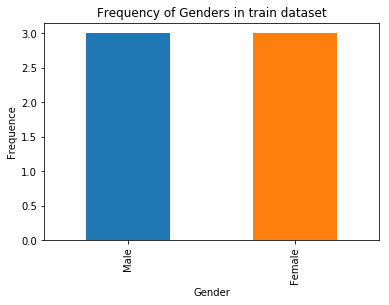

In [64]:
print('Total number of \'Males\' and \'Females\' in Train Dataset ')

x=train_data.gender.value_counts().plot.bar(title='Frequency of Genders in train dataset')
x.set_xlabel('Gender')
x.set_ylabel('Frequence')

Total number of 'Males' and 'Females' in Test Dataset 


Text(0,0.5,'Frequence')

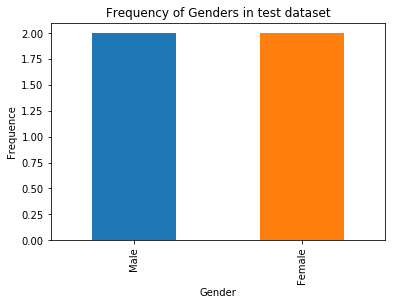

In [65]:
print('Total number of \'Males\' and \'Females\' in Test Dataset ')
x=test_data.gender.value_counts().plot.bar(title='Frequency of Genders in test dataset')
x.set_xlabel('Gender')
x.set_ylabel('Frequence')

Number of people having various hair length in Train datset:


Text(0.5,1,'Hairs Frequecy graph of train dataset')

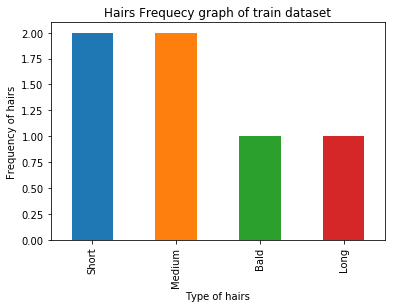

In [66]:
print('Number of people having various hair length in Train datset:')
ax = train_data.hair.value_counts().plot.bar()
ax.set_xlabel('Type of hairs')
ax.set_ylabel('Frequency of hairs')
ax.set_title('Hairs Frequecy graph of train dataset')

Number of people having various hair length in Test datset:


Text(0.5,1,'Hairs Frequecy graph of test dataset')

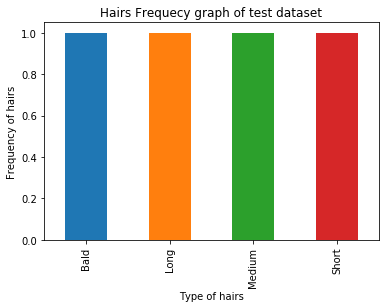

In [67]:
print('Number of people having various hair length in Test datset:')
ax = test_data.hair.value_counts().plot.bar()
ax.set_xlabel('Type of hairs')
ax.set_ylabel('Frequency of hairs')
ax.set_title('Hairs Frequecy graph of test dataset')

Number of people have/haven't beard in Train dataset


Text(0.5,1,'Frequency of people having or not having beard in Train dataset')

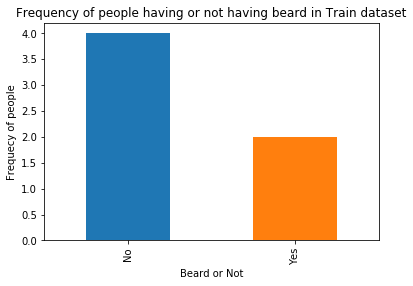

In [68]:
print('Number of people have/haven\'t beard in Train dataset')
ax = train_data.beard.value_counts().plot.bar()
ax.set_xlabel('Beard or Not')
ax.set_ylabel('Frequecy of people')
ax.set_title('Frequency of people having or not having beard in Train dataset')

Number of people have/haven't beard in Test dataset


Text(0.5,1,'Frequency of people having or not having beard in Test dataset')

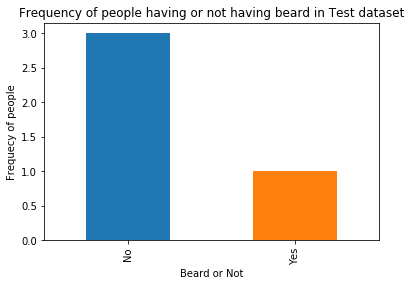

In [69]:
print('Number of people have/haven\'t beard in Test dataset')
ax = test_data.beard.value_counts().plot.bar()
ax.set_xlabel('Beard or Not')
ax.set_ylabel('Frequecy of people')
ax.set_title('Frequency of people having or not having beard in Test dataset')

### 2.3: Pre-Process Data

In [70]:
print('Train dataset before pre-processing:')
train_data.head()

Train dataset before pre-processing:


,height,weight,hair,beard,scarf,gender
0,180.3000,196,Bald,Yes,No,Male
1,170.0000,120,Long,No,No,Female
2,178.5000,200,Short,No,No,Male
3,163.4000,110,Medium,No,Yes,Female
4,175.2222,220,Short,Yes,No,Male


In [71]:
train_data.height=train_data.height.round(1)

In [72]:
print('Train dataset after pre-processing')
train_data

Train dataset after pre-processing


,height,weight,hair,beard,scarf,gender
0,180.3,196,Bald,Yes,No,Male
1,170.0,120,Long,No,No,Female
2,178.5,200,Short,No,No,Male
3,163.4,110,Medium,No,Yes,Female
4,175.2,220,Short,Yes,No,Male
5,165.0,150,Medium,No,Yes,Female


### Step 3 : Label Encoding for Train/Test Data

In [73]:
encoder = LabelEncoder()

In [82]:
encoder_class = dict()
for col in train_data.columns[2:]:
    encoder_class[col] = LabelEncoder()
    encoder_class[col].fit(train_data.loc[:,col])
numpy.save('Encoder_class.npy',encoder_class) 

In [83]:
print('Gender Attribute Encoding in Train Dataset:')
x = pd.DataFrame(train_data.gender)
x['Encoded Gender ']=encoder_class['gender'].transform(train_data.gender) 
x

Gender Attribute Encoding in Train Dataset:


,gender,Encoded Gender
0,Male,1
1,Female,0
2,Male,1
3,Female,0
4,Male,1
5,Female,0


In [84]:
print('Beard Attribute Encoding in Train Dataset:')
x = pd.DataFrame(train_data.beard)
x['Encoded Beard ']= encoder_class['beard'].transform(train_data.beard) 
x

Beard Attribute Encoding in Train Dataset:


,beard,Encoded Beard
0,Yes,1
1,No,0
2,No,0
3,No,0
4,Yes,1
5,No,0


In [85]:
print('Scarf Attribute Encoding in Train Dataset:')
x = pd.DataFrame(train_data.scarf)
x['Encoded Scraf ']= encoder_class['scarf'].transform(train_data.scarf) 
x

Scarf Attribute Encoding in Train Dataset:


,scarf,Encoded Scraf
0,No,0
1,No,0
2,No,0
3,Yes,1
4,No,0
5,Yes,1


In [86]:
print('Hair Attribute Encoding in Train Dataset:')
x = pd.DataFrame(train_data.hair)
x['Encoded Hair ']= encoder_class['hair'].transform(train_data.hair) 
x

Hair Attribute Encoding in Train Dataset:


,hair,Encoded Hair
0,Bald,0
1,Long,1
2,Short,3
3,Medium,2
4,Short,3
5,Medium,2


In [87]:
print('Orignal Train Data:')
train_data

Orignal Train Data:


,height,weight,hair,beard,scarf,gender
0,180.3,196,Bald,Yes,No,Male
1,170.0,120,Long,No,No,Female
2,178.5,200,Short,No,No,Male
3,163.4,110,Medium,No,Yes,Female
4,175.2,220,Short,Yes,No,Male
5,165.0,150,Medium,No,Yes,Female


In [88]:
Encoded_train_data = train_data.copy()
for c in Encoded_train_data.iloc[:,2:].columns:
    Encoded_train_data[c] = encoder_class[c].transform(Encoded_train_data[c])
print('Train Data after Label Encoding:')
Encoded_train_data

Train Data after Label Encoding:


,height,weight,hair,beard,scarf,gender
0,180.3,196,0,1,0,1
1,170.0,120,1,0,0,0
2,178.5,200,3,0,0,1
3,163.4,110,2,0,1,0
4,175.2,220,3,1,0,1
5,165.0,150,2,0,1,0


In [89]:
print('Orignal Test Data:')
test_data

Orignal Test Data:


,height,weight,hair,beard,scarf,gender
0,179.1,185,Long,Yes,No,Male
1,160.5,130,Short,No,No,Female
2,177.8,160,Bald,No,No,Male
3,161.1,100,Medium,No,No,Female


In [90]:
Encoded_test_data = test_data.copy()
for c in Encoded_test_data.iloc[:,2:].columns:
    Encoded_test_data[c] = encoder_class[c].transform(Encoded_test_data[c])
print('Test Data after Label Encoding:')
Encoded_test_data

Test Data after Label Encoding:


,height,weight,hair,beard,scarf,gender
0,179.1,185,1,1,0,1
1,160.5,130,3,0,0,0
2,177.8,160,0,0,0,1
3,161.1,100,2,0,0,0


## Step 5: Train ML Algorithm using Train Data

In [91]:
train_X = Encoded_train_data.drop('gender',axis = 1)
train_y = Encoded_train_data['gender']


In [92]:
train_X

,height,weight,hair,beard,scarf
0,180.3,196,0,1,0
1,170.0,120,1,0,0
2,178.5,200,3,0,0
3,163.4,110,2,0,1
4,175.2,220,3,1,0
5,165.0,150,2,0,1


In [93]:
train_y

0    1
1    0
2    1
3    0
4    1
5    0
Name: gender, dtype: int64

In [94]:
test_X = Encoded_test_data.drop('gender',axis = 1)
test_y = Encoded_test_data['gender']


In [95]:
test_X

,height,weight,hair,beard,scarf
0,179.1,185,1,1,0
1,160.5,130,3,0,0
2,177.8,160,0,0,0
3,161.1,100,2,0,0


In [96]:
test_y

0    1
1    0
2    1
3    0
Name: gender, dtype: int64

##### Logistic Regression Parameters

Parameters and their values:

LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='liblinear', max_iter=100, multi_class='ovr', verbose=0, warm_start=False, n_jobs=1)

In [117]:
from sklearn.linear_model import LogisticRegression
LogisticRegression = LogisticRegression()
LogisticRegression.fit(train_X,train_y)
LogisticRegression_prediction = LogisticRegression.predict(test_X)
accuracy_LogisticRegression = accuracy_score(test_y,LogisticRegression_prediction)


##### Random forest  Parameters

Parameters and their values:

RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, class_weight=None)
Docstring:     
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and use averaging to
improve the predictive accuracy and control over-fitting.
The sub-sample size is always the same as the original
input sample size but the samples are drawn with replacement if
`bootstrap=True` (default).

In [118]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier = RandomForestClassifier()
RandomForestClassifier.fit(train_X,train_y)
RandomForestClassifier_prediction = RandomForestClassifier.predict(test_X)
accuracy_RandomForestClassifier = accuracy_score(test_y,RandomForestClassifier_prediction)


##### Linear SVC Parameters
Parameters and their values:

LinearSVC(penalty='l2', loss='squared_hinge', dual=True, tol=0.0001, C=1.0, multi_class='ovr', fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=0, random_state=None, max_iter=1000)
Docstring:     
Linear Support Vector Classification.

Similar to SVC with parameter kernel='linear', but implemented in terms of
liblinear rather than libsvm, so it has more flexibility in the choice of
penalties and loss functions and should scale better to large numbers of
samples.

In [119]:
from sklearn.svm import LinearSVC
LinearSVC = LinearSVC()
LinearSVC.fit(train_X,train_y)
prediction = LinearSVC.predict(test_X)
accuracy_LinearSVC = accuracy_score(test_y,prediction)


##### BernoulliNB
Parameters and their values:

BernoulliNB(alpha=1.0, binarize=0.0, fit_prior=True, class_prior=None)

In [120]:
from sklearn.naive_bayes import BernoulliNB
BernoulliNB = BernoulliNB()
BernoulliNB.fit(train_X,train_y)
prediction = BernoulliNB.predict(test_X)
accuracy_BernoulliNB = accuracy_score(test_y,prediction)


### Step 6: Evaluate ML Algorithms using Test Data

#### Logistic Regression Classifier

In [121]:
x=test_data.copy()
x['predicted_gender']=encoder_class['gender'].inverse_transform(LogisticRegression_prediction)

/home/omer/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [122]:
print('Prediction using Logistic Regression\n')
print(x)
print('\nAccuracy Score = ',accuracy_LogisticRegression)

Prediction using Logistic Regression

   height  weight    hair beard scarf  gender predicted_gender
0   179.1     185    Long   Yes    No    Male             Male
1   160.5     130   Short    No    No  Female           Female
2   177.8     160    Bald    No    No    Male           Female
3   161.1     100  Medium    No    No  Female           Female

Accuracy Score =  0.75


#### Random Forest Classifier

In [123]:
x=test_data.copy()
x['predicted_gender']=encoder_class['gender'].inverse_transform(RandomForestClassifier_prediction)

/home/omer/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [124]:
print('Prediction using RandomForestClassifier\n')
print(x)
print('\nAccuracy Score = ',accuracy_RandomForestClassifier)

Prediction using RandomForestClassifier

   height  weight    hair beard scarf  gender predicted_gender
0   179.1     185    Long   Yes    No    Male             Male
1   160.5     130   Short    No    No  Female           Female
2   177.8     160    Bald    No    No    Male             Male
3   161.1     100  Medium    No    No  Female           Female

Accuracy Score =  1.0


##### BernoulliNB

In [125]:
x=test_data.copy()
x['predicted_gender']=encoder_class['gender'].inverse_transform(prediction)

/home/omer/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [126]:
print('Prediction using BernoulliNB\n')
print(x)
print('\nAccuracy Score = ',accuracy_BernoulliNB)

Prediction using BernoulliNB

   height  weight    hair beard scarf  gender predicted_gender
0   179.1     185    Long   Yes    No    Male             Male
1   160.5     130   Short    No    No  Female           Female
2   177.8     160    Bald    No    No    Male             Male
3   161.1     100  Medium    No    No  Female           Female

Accuracy Score =  1.0


##### LinearSVC

In [127]:
x=test_data.copy()
x['predicted_gender']=encoder_class['gender'].inverse_transform(prediction)

/home/omer/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [128]:
print('Prediction using LinearSVC\n')
print(x)
print('\nAccuracy Score = ',accuracy_LinearSVC)

Prediction using LinearSVC

   height  weight    hair beard scarf  gender predicted_gender
0   179.1     185    Long   Yes    No    Male             Male
1   160.5     130   Short    No    No  Female           Female
2   177.8     160    Bald    No    No    Male             Male
3   161.1     100  Medium    No    No  Female           Female

Accuracy Score =  0.75


### Step 7: Selection of Best Model

In [130]:
models = pd.DataFrame({'Models':
                       ['LogisticRegression',
                        'RandomForestClassifier',
                        'LinearSVC',
                        'BernoulliN'],
                       'Accuracy':[accuracy_LogisticRegression,
                                  accuracy_RandomForestClassifier,
                                  accuracy_LinearSVC,
                                  accuracy_BernoulliNB]
                        })

In [131]:
print('Detail Performance of all the models')
models

Detail Performance of all the models


,Models,Accuracy
0,LogisticRegression,0.75
1,RandomForestClassifier,1.00
2,LinearSVC,0.75
3,BernoulliN,1.00


In [132]:
print("Best Model")
models.max()

Best Model


Models      RandomForestClassifier
Accuracy                         1
dtype: object

### Step 8: Application Phase

### Step 8.1: Combine Data (Train+Test)

In [133]:
print('Train Features in form of Datafram:\n')
print(Encoded_train_data)

Train Features in form of Datafram:

   height  weight  hair  beard  scarf  gender
0   180.3     196     0      1      0       1
1   170.0     120     1      0      0       0
2   178.5     200     3      0      0       1
3   163.4     110     2      0      1       0
4   175.2     220     3      1      0       1
5   165.0     150     2      0      1       0


In [134]:
print('Test Features in form of Datafram:\n')
print(Encoded_test_data)

Test Features in form of Datafram:

   height  weight  hair  beard  scarf  gender
0   179.1     185     1      1      0       1
1   160.5     130     3      0      0       0
2   177.8     160     0      0      0       1
3   161.1     100     2      0      0       0


In [135]:
train_test_data = pd.concat([Encoded_train_data,Encoded_test_data],axis=0)

In [136]:
print('All Features in form of Dataframe:')
train_test_data

All Features in form of Dataframe:


,height,weight,hair,beard,scarf,gender
0,180.3,196,0,1,0,1
1,170.0,120,1,0,0,0
2,178.5,200,3,0,0,1
3,163.4,110,2,0,1,0
4,175.2,220,3,1,0,1
5,165.0,150,2,0,1,0
0,179.1,185,1,1,0,1
1,160.5,130,3,0,0,0
2,177.8,160,0,0,0,1
3,161.1,100,2,0,0,0


### Step 8.2 : Train Best Model on All Data

##### Which is Random forest in our case

In [137]:
RandomForestClassifier

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [138]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier = RandomForestClassifier()
X = train_test_data.drop('gender',axis=1)
y = train_test_data['gender']

trainedModel = RandomForestClassifier.fit(scipy.sparse.csr_matrix(X),y)


### Step 8.3 : Save the trained Model

In [139]:
f = open('trainedModelfile','wb')
pickle.dump(trainedModel,f)
f.close()

## Step 9.1 Load the Traind Model

In [140]:

f = open('trainedModelfile','rb')

trained_model = pickle.load(f)
f.close()

### Step 9.2: Take inputs from User

In [142]:
height = input('Please enter your Height here (centimeter): ')

Please enter your Height here (centimeter): 170


In [143]:
round(float(height),3)

170.0

In [144]:
weight = input('Please enter your Weight here (Kg): ')

Please enter your Weight here (Kg): 120


In [145]:
hair = input('Please enter your Hair Length here (Bald/Long/Short/Medium): ')

Please enter your Hair Length here (Bald/Long/Short/Medium): Long


In [146]:
beard = input('Do you have beard? (Yes/No)')

Do you have beard? (Yes/No)Yes


In [147]:
scraf = input('Do you wear Scarf? (Yes/No)')

Do you wear Scarf? (Yes/No)Yes


### Step 9.3: Convert User input into Feature Vector

In [148]:
input_feature_vector = pd.DataFrame({'height':[round(float(height),1)],
                                     'weight':[weight],
                                    'hair':[hair],
                                     'beard':[beard],
                                     'scarf':[scraf]
                                    })

In [149]:
Encoded_input_feature_vector = input_feature_vector.copy()

In [150]:
print('User input in Actual DataFrame form:')
input_feature_vector

User input in Actual DataFrame form:


,height,weight,hair,beard,scarf
0,170.0,120,Long,Yes,Yes


In [151]:
encoder_class =numpy.load('Encoder_class.npy').all()

In [152]:
Encoded_input_feature_vector = input_feature_vector.copy()
for c in Encoded_input_feature_vector.iloc[:,2:].columns:
    Encoded_input_feature_vector[c] = encoder_class[c].transform(Encoded_input_feature_vector[c])
print('User input in Encoded DataFrame form:')
Encoded_input_feature_vector

User input in Encoded DataFrame form:


,height,weight,hair,beard,scarf
0,170.0,120,1,1,1


In [153]:
print('User input in Actual DataFrame form:\n\n',input_feature_vector)
print('\nUser input in Encoded DataFrame form:\n\n',Encoded_input_feature_vector)


User input in Actual DataFrame form:

    height weight  hair beard scarf
0   170.0    120  Long   Yes   Yes

User input in Encoded DataFrame form:

    height weight  hair  beard  scarf
0   170.0    120     1      1      1


### Step 9.4 Apply Trained Model on Feature Vector of Unseen Data and Output Prediction to User

In [154]:
prediction_of_user_input = trained_model.predict(Encoded_input_feature_vector)
prediction_of_user_input

array([0])

In [155]:
decoded_prediction_of_user_input = encoder_class['gender'].inverse_transform(prediction_of_user_input)[0]

/home/omer/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [156]:

print("Prediction : ",decoded_prediction_of_user_input)

Prediction :  Female
